# Exploratory Visualization

We begin with an initial data exploration.

In [1]:
from workflow_classes.data_exploration import DataExplorator

### Specify which folders to read from when loading training and testing data

Each training image must be placed in a folder whose name is the label for the image. For example, a Type 1 image called `1.jpg` must have a path ending in `"/Type_1/1.jpg"`.

The testing images, on the other hand, have no labels and should thus be located all together in a folder.

 - `training_folders` should be a list of folder-names we get images from, i.e. a list of strings.
 - `testing_folder` should be a single folder, i.e. a string.

In [2]:
# ===================== USER INPUT =====================
training_folders = ["./Data/train"] #+ ["./Data/Type_1", "./Data/Type_2", "./Data/Type_3"]
testing_folder = "./Data/test"
# ======================================================

### Create a data-exploration object and test whether it reads the images correctly

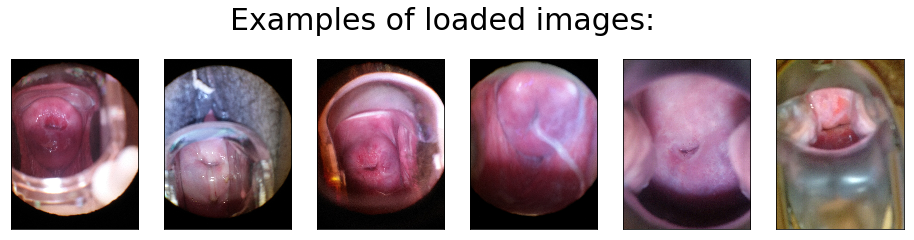

In [3]:
# ============ DOES NOT REQUIRE USER INPUT =============
dataexpl = DataExplorator(training_folders=training_folders, testing_folder=testing_folder)
dataexpl.test_loading()

### Create a "data summary" of each image

For the data exploration we turn each image into an average RGB value, to see if there are any differences among the cervix types. We also compute the percentage of "red" pixels in each image and compare the three types of cervix-images.

Due to the number of images, this data takes a while to compute (expect at least 4 hours).

In [4]:
# ============ DOES NOT REQUIRE USER INPUT =============
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning)
    dataexpl.create_pixel_summary_data()

The data exploration file already exists in the folder ExploratoryAnalysis; did not recompute it.


## Visualize the exploratory data

We are now ready to plot the data for each cervix type.

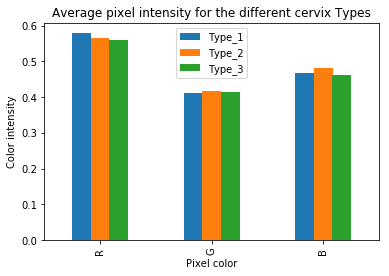

In [5]:
# ============ DOES NOT REQUIRE USER INPUT =============
dataexpl.plot_mean_RGBs()

From the above we see that Type 1, on average, has more red pixels than the other two cervix types.

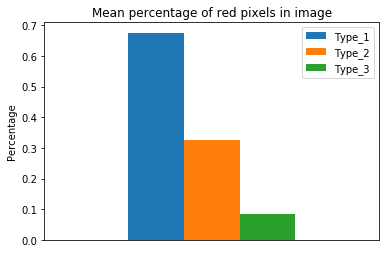

In [6]:
# ============ DOES NOT REQUIRE USER INPUT =============
dataexpl.plot_percentage_red_pixels()

From this plot we see that the percentage of red pixels in the images is significantly different for the three cervix types.

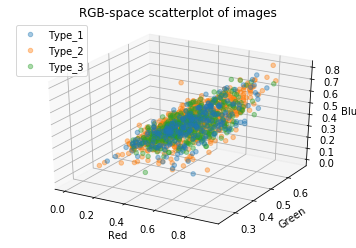

In [7]:
# ============ DOES NOT REQUIRE USER INPUT =============
dataexpl.plot_RGB_scatter()

From this we see that there appears to be no particular clustering in RGB space for the different cervix types.

# Data preprocessing

Here we preprocess the data, loading the image files and saving them to disk them as numpy arrays.

We can specify the folder structure of how we save the files, which images we import for training and testing, and what type of preprocessing we choose to do on the images.

In [8]:
from workflow_classes.basic_preprocessing import DataPreprocessor

### Specify which folders to read from when loading training and testing data

This is the same as for the data exploration

In [9]:
# ===================== USER INPUT =====================
training_folders = ["./Data/train"] #+ ["./Data/Type_1", "./Data/Type_2", "./Data/Type_3"]
testing_folder = "./Data/test"
# ======================================================

### Create a preprocessing object and test whether it reads the images correctly

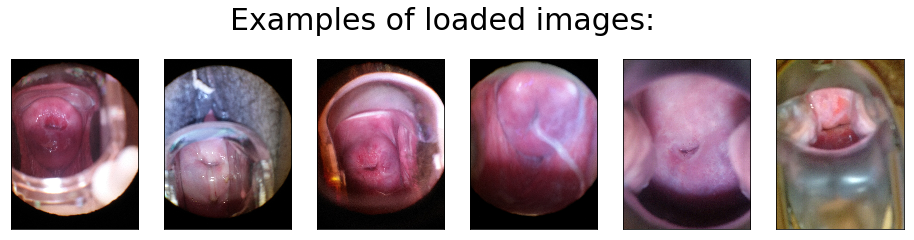

In [10]:
# ============ DOES NOT REQUIRE USER INPUT =============
preproc = DataPreprocessor(training_folders=training_folders, testing_folder=testing_folder)
preproc.test_loading()

## STEP 1: Simply resize the data

We will perform three different preprocessings on the data. On the first run, we will simply resize the data to a good size. On the second run, we will crop the images, turn them square, and resize them. On the third run, we will crop the images, turn them into *diagrams*, and resize them to an appropriate size.

### Find a good image resizing

The input images are large, typically several thousands of pixels on each axis. We want to resize them to as small as possible, while allowing a human to look at the image and still be able to tell which Type it is.

Here we can play with the variable `resize_shape` to choose one that does not wash out important information in the images.

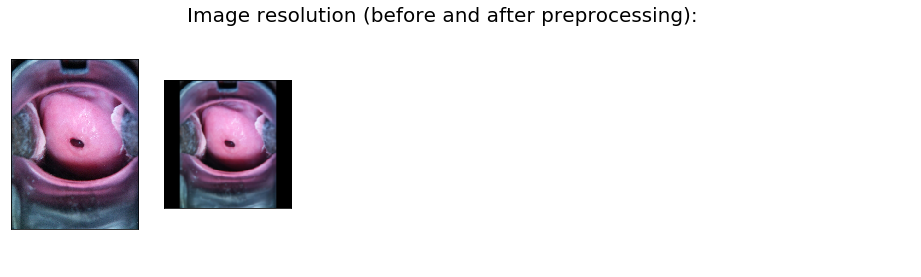

In [11]:
# ===================== USER INPUT =====================
preproc.test_resizing(resize_shape=(150, 150, 3), index_image=17, crop=False, diagram=False)
#preproc.test_resizing(crop=True, resize_shape=(80, 80, 3), index_image=36, diagram=True)

### Specify parameters for preprocessing

 - `data_folder` is the folder in which we save the preprocessed numpy arrays, needed for TensorFlow training.
 - `training_subfolder` is the subfolder inside `data_folder` which contains the training numpy arrays (and their labels).
 - `testing_subfolder` is the subfolder inside `data_folder` which contains the testing numpy arrays (as well as a little auxiliary information about the arrays: which image each row corresponds to, and what order the Type 1, Type 2 and Type 3 appear in the one-hot-encoded labels).
 - `optimal_resize_shape` is the best resizing shape chosen above.
 - `crop_image` specifies whether we want to save the cropped versions of the images or whether we want the full image.
 - There are a lot of training images. We thus preprocess them in batches. `batch_size` controls the number of images in each batch. Note that if some images cannot be preprocessed, some batches will contain fewer than `batch_size` images.
 - Preprocessing can take some time. `parallelize` controls whether we want to parallelize this job over all local cores.

In [12]:
# ===================== USER INPUT =====================
data_folder = "./TensorFlow_data"
training_subfolder = "/training_data_nocrop"
testing_subfolder = "/testing_data_nocrop"
optimal_resize_shape = (150, 150, 3)
crop_image = False
diagramize_image = False
batch_size = 2**8
parallelize = True
# ======================================================

### Execute the preprocessing

*N.B. The preprocessing only gets recomputed if it is unable to detect the correct number of files in the expected folders. Therefore, if you change `optimal_resize_shape` and leave all other variables intact, the preprocessing will not happen! If you want to make sure all the numpy arrays get recomptued, you should delete the folders containing the numpy-array data.*

In [13]:
# ============ DOES NOT REQUIRE USER INPUT =============
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning)
    preproc.preprocess_save(data_folder=data_folder,
                            training_subfolder=training_subfolder,
                            testing_subfolder=testing_subfolder,
                            resize_shape=optimal_resize_shape,
                            batch_size=batch_size, crop=crop_image,
                            diagram=diagramize_image, parallelize=parallelize)

## STEP 2: Crop and resize the data

### Find a good image resizing

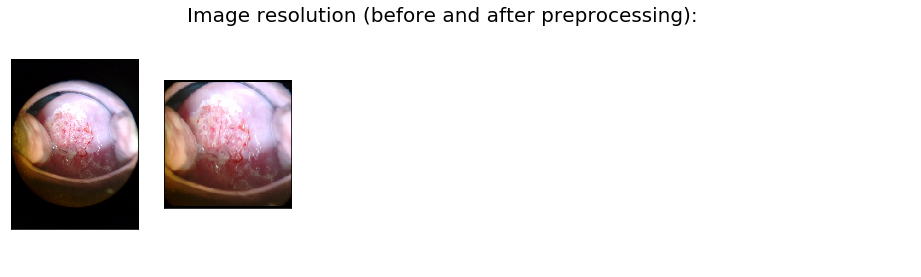

In [14]:
# ===================== USER INPUT =====================
preproc.test_resizing(resize_shape=(150, 150, 3), index_image=19, crop=True, diagram=False)

### Specify parameters for preprocessing

In [15]:
# ===================== USER INPUT =====================
data_folder = "./TensorFlow_data"
training_subfolder = "/training_data_crop"
testing_subfolder = "/testing_data_crop"
optimal_resize_shape = (150, 150, 3)
crop_image = True
diagramize_image = False
batch_size = 2**8
parallelize = True
# ======================================================

### Execute the preprocessing

In [16]:
# ============ DOES NOT REQUIRE USER INPUT =============
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning)
    preproc.preprocess_save(data_folder=data_folder,
                            training_subfolder=training_subfolder,
                            testing_subfolder=testing_subfolder,
                            resize_shape=optimal_resize_shape,
                            batch_size=batch_size, crop=crop_image,
                            diagram=diagramize_image, parallelize=parallelize)

## STEP 3: Turn the images into diagrams and resize them

### Find a good image resizing

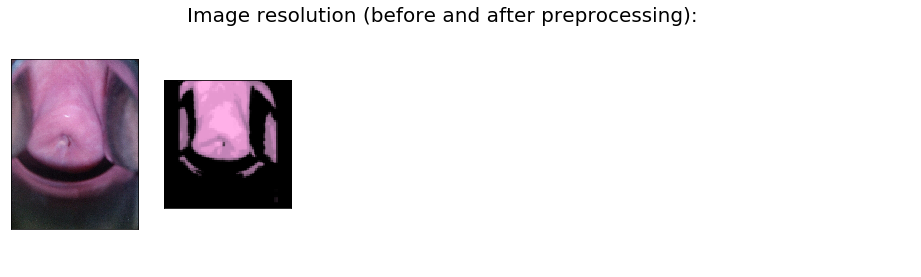

In [17]:
# ===================== USER INPUT =====================
preproc.test_resizing(resize_shape=(80, 80, 3), index_image=36, crop=True, diagram=True)

### Specify parameters for preprocessing

In [18]:
# ===================== USER INPUT =====================
data_folder = "./TensorFlow_data"
training_subfolder = "/training_data_cropdiagram"
testing_subfolder = "/testing_data_cropdiagram"
optimal_resize_shape = (80, 80, 3)
crop_image = True
diagramize_image = True
batch_size = 2**8
parallelize = True
# ======================================================

### Execute the preprocessing

In [19]:
# ============ DOES NOT REQUIRE USER INPUT =============
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning)
    preproc.preprocess_save(data_folder=data_folder,
                            training_subfolder=training_subfolder,
                            testing_subfolder=testing_subfolder,
                            resize_shape=optimal_resize_shape,
                            batch_size=batch_size, crop=crop_image,
                            diagram=diagramize_image, parallelize=parallelize)

# Benchmark Model

Since what determines the type of cancer is closely related to the colors seen in the images (bright red if often indicative of Type 1 whereas all white is indicative of Type 3), as a benchmark model we'll perform a random forest precisely on the average-pixel RGB of each image.

In [20]:
from workflow_classes.benchmark_model import BenchmarkModel

We create the BenchmarkModel object

In [21]:
# ============ DOES NOT REQUIRE USER INPUT =============
benchmdl = BenchmarkModel()

### Training

We will now train the model. In order to do this, we need to specify:

 - `totnumbatches` is not strictly speaking an input for training, just a convenience variable which counts the total number of training that we have.
 - `training_folder` is a string specifying the folder containing the numpy arrays for the training set.
 - `training_batches` is a list speciying the set of batches we use for training, i.e. each element of `training_batches` is an integer.
 - `leftright` is a boolean specifying whether we also train on images that have bee flipped left-to-right.
 - `updown` is a boolean specifying whether we also train on images that have bee flipped upside-down.
 - `agnosticic_average` lets us average the predicted probabilities with the agnostic probabilities (which assign equal probability to all categories). `agnosticic_average` is an int which specifies how many times we average with the agnostic probability.
 
The validation set can be specified in one of two ways. Either we can specify a batch number to be validation set, or we can feed it a specific array of our choice.

 - `validation_batch` is the integer specifying which validation batch we use for validation.
 - Alternatively, we can specify `validation_inputarray` as the input array (with shape `(number of data points, size of x-axis, size of y-axis, number of color channels)`). We then also need to specify the validation labels with `validation_labels` (which should have shape `(number of data points, number of output channels)`).
 
***N.B. It's important you ONLY set `validation_batch`, or ONLY set `validation_inputarray` and `validation_labels`!***

In [22]:
# ===================== USER INPUT =====================
totnumbatches = benchmdl.count_training_batches("./TensorFlow_data/training_data_nocrop")
training_folder = "./TensorFlow_data/training_data_nocrop"
training_batches = range(1, totnumbatches)
leftright = True
updown = True
agnosticic_average = 0

validation_batch = 0
validation_inputarray = []
validation_labels = []
#benchmdl.model_name = "random_forest"
# ======================================================

Now perform the training on a random forest.

In [23]:
# ============ DOES NOT REQUIRE USER INPUT =============
(benchmark_accuracy,
 benchmark_train_loss,
 benchmark_val_loss) = benchmdl.train(training_batches=training_batches,
                                      leftright=leftright, updown=updown,
                                      validation_inputarray=validation_inputarray,
                                      validation_labels=validation_labels,
                                      validation_batchnum=validation_batch,
                                      agnosticic_average=agnosticic_average,
                                      training_folder=training_folder)
print("Accuracy: {}\nTraining loss: {}\nValidation loss: {}".format(benchmark_accuracy,
                                                                    benchmark_train_loss,
                                                                    benchmark_val_loss))

Accuracy: 0.36165577342
Training loss: 0.88592933241
Validation loss: 4.77783592516


The loss for a completely agnostic probability would be 1.0986. Here we see that we do significantly worse than that, ***due to over-confident predictions***.

### Make predictions on test set¶

We may now use the trained model to make a prediction on the test set.

 - `load_test_set` is the full path to the numpy data file which contains the test-set data.
 - Alternatively, the test set can be specified with the variable `test_set`.
 - `save_prob_location` is the full path to the folder in which we want to save the predicted probabilities. These may be useful for later.

In [24]:
# ===================== USER INPUT =====================
load_test_set = "./TensorFlow_data/testing_data_nocrop/testing_images.npy"
test_set = []
save_prob_location = "./BenchmarkProbabilities"
# ======================================================

We now make a prediction on the test set and save the predicted probabilities in the folder specified by `save_prob_location`.

In [25]:
# ============ DOES NOT REQUIRE USER INPUT =============
from modules.path_munging import create_folder
import numpy as np

create_folder(save_prob_location)
benchmdl_probabilities = benchmdl.test(load_test_set=load_test_set, test_set=test_set,
                              agnosticic_average=agnosticic_average)
np.save(save_prob_location + "/benchmarkprobs.npy", benchmdl_probabilities)

# Neural Network

We construct a variety of neural networks and study their scores depending on the sizes and architectures of the network.

In [26]:
from workflow_classes.convnet import ConvNet

## LetNet-like networks

We study LeNet-like convolutional neural networks, which consist of a couple of convolutional layers (with max pooling) followed by a few fully-connected layers.

### Specify parameters

We will train on a network with a specific architecture. To speed up training, we will train with a larger learning rate, and fine-tune our training with a smaller learning rate.

 - `input_shape` is the dimension-shape of the input image arrays.
 - `output_channels` is the number of output categories (i.e. cervix Types).
 - `convolutional_layers` specifies the parameters for the convolutional + max pooling layers. Each layer has the form  
 ```[int (number of output channels),  
    tuple of length 2 (size of conv filter),  
    tuple of length 2 (step size of conv filter),  
    tuple of length 2 (size of max pooling filter),  
    tuple of length 2 (step size max pooling filter)]```
 - `connected_layers` specifies the parameters for the fully connected layers. It is a list where each element is the number of neurons in the layer.
 - `keep_prob` is the dropout keep_prob (usually recommended to be 0.5).
 - `learning_rate` is the learning rate. We can change this later if needed.
 - `model_name` is the model's name, used when saving and loading trained models.

In [27]:
# ===================== USER INPUT =====================
input_shape = (150, 150, 3)
output_channels = 3
convolutional_layers = [[20, (4, 4), (1, 1), (2, 2), (2, 2)],
                        [40, (4, 4), (1, 1), (2, 2), (2, 2)]]
connected_layers = [100, 30]
keep_prob = 0.5
learning_rate = 0.001 # standard value is 0.001
model_name = "lenet_2x2_nocrop" # This name means we have 2 convolutional layers and 2 fully connected layers
# ======================================================

Now we initialize the network with the properties specified above.

In [28]:
# ============ DOES NOT REQUIRE USER INPUT =============
network_nocrop = ConvNet(input_shape=input_shape,
                         output_channels=output_channels, 
                         convolutional_layers=convolutional_layers,
                         connected_layers=connected_layers, 
                         keep_prob=keep_prob,
                         learning_rate=learning_rate,
                         model_name=model_name)

## Training

We will now train the neural network. We begin by specifying the parameters for training.

 - `data_folder` is the folder in which we previously saved the preprocessed numpy arrays, needed for TensorFlow training.
 - `training_subfolder` is the subfolder inside `data_folder` which contains the training numpy arrays (and their labels).
 - `testing_subfolder` is the subfolder inside `data_folder` which contains the testing numpy arrays (as well as a little auxiliary information about the arrays: which image each row corresponds to, and what order the Type 1, Type 2 and Type 3 appear in the one-hot-encoded labels).
 - `size_of_minibatch` is the size of each training-step minibatch, i.e. the number of input images in each training step.

The validation set can be specified in one of two ways. Either we can specify a batch number to be the validation set, or we can feed it a specific array of our choice.

 - `validation_batch` is the integer specifying which validation batch we use for validation.
 - Alternatively, we can specify `validation_inputarray` as the input array (with shape `(number of data points, size of x-axis, size of y-axis, number of color channels)`). We then also need to specify the validation labels with `validation_labels` (which should have shape `(number of data points, number of output channels)`).
 
***N.B. It's important you ONLY set `validation_batch`, or ONLY set `validation_inputarray` and `validation_labels`!***

In [29]:
# ===================== USER INPUT =====================
data_folder = "./TensorFlow_data"
training_subfolder = "/training_data_nocrop"
testing_subfolder = "/testing_data_nocrop"
size_of_minibatch = 2**6
totnumbatches = network_nocrop.count_training_batches(data_folder + training_subfolder)
validation_batch = 0
validation_inputarray = []
validation_labels = []

# If we specified the validation set by hand, we might like to balance it by oversampling

#from modules.neural_network import oversample
#(validation_inputarray, validation_labels) = oversample(validation_inputarray, validation_labels)
# ======================================================

Test whether the network correctly loads the images.

Image shape: (150, 150, 3)


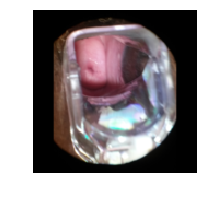

In [30]:
# ============ DOES NOT REQUIRE USER INPUT =============
network_nocrop.test_loading(batch_and_index=(0, 32), batch_loc=(data_folder+training_subfolder))

### STEP 1: Perform the training on resized images

We begin by fitting the neural network to the images that have been resized but not cropped.

It's OK to overfit, since we are saving intermediate models during training, and we can simply choose as our "final" model any one of the intermediate models.

Each time we train we specify:

 - `epochs` is the number of epochs we train for.
 - `load_saved_model` is used for loading a saved model. It is the full path to the saved model, including epoch number, e.g. `./TensorFlow_data/trained_models/mysavedmodel-20`. If we do not want to load a model, we set `load_saved_model=""`.
 - `training_batches` is a list speciying the set of batches we use for training, i.e. each element of `training_batches` is an integer.
 - `leftright` is a boolean specifying whether we also train on images that have bee flipped left-to-right.
 - `updown` is a boolean specifying whether we also train on images that have bee flipped upside-down.
 - `save_model` is a boolean specifying whether we should save our trained model as we train. The ConvNet saves the model every ten epochs, as well as the final epoch.
 - `model_destination_folder` is the folder in which we want to save our trained model. If we are loading a saved model and further training it, this variable can be set to `model_destination_folder=""`, which will save the further trained models into the same folder as `load_saved_model`. 
 - `printout` is a boolean which sets whether we want printouts with loss and accuracy as we train.
 - We set the learning rate, dropout rate and model name for this training run.

In [31]:
# ===================== USER INPUT =====================
epochs = 100
load_saved_model = ""
training_batches = range(1, totnumbatches)
leftright = True
updown = True
save_model = True
model_destination_folder = "./TensorFlow_data/lenet_2x2_nocrop"
printout = False
# ======================================================

Define a function which performs the training according to the parameters we have just specified.

In [32]:
# ============ DOES NOT REQUIRE USER INPUT =============
# These modules will be useful later
from modules.visualization import plot_accuracy_trainloss_valloss
from os.path import isfile
import numpy as np

def training_round(network, accuracies, train_losses, val_losses):
    """
    Performs the neural networks training according to the specifications set by the global variables.
    Takes three lists:
        accuracies: list of accuracy values, for each epoch of previously-done training
        train_losses: list of training-set losses for each epoch of previous training
        val_losses: list of validation-set losses for each epoch of previous traning.
    Returns:
        Updated lists of accuracies, train_losses, val_losses, after having performed an additional set 
        of epochs of training.
    """
    #Work out whether we specify the validation set using a batch number or a manually set array
    try:
        global validation_batch
        validation_inputarray = []
        validation_labels = []
    except:
        validation_batch = 0
        validation_inputarray = validation_inputarray
        validation_labels = validation_labels
    
    # Perform the training
    (accuracy_list,
    training_losses,
    validation_losses) = network.train(epochs=epochs,
                                       load_saved_model=load_saved_model,
                                       training_folder=data_folder+training_subfolder,
                                       training_batches=training_batches,
                                       leftright=leftright, updown=updown,
                                       size_of_minibatch=size_of_minibatch,
                                       validation_inputarray=validation_inputarray,
                                       validation_labels=validation_labels,
                                       validation_batchnum=validation_batch,
                                       printout=printout,
                                       save_model=save_model,
                                       model_destination_folder=model_destination_folder)
    
    return accuracies + accuracy_list,  train_losses + training_losses, val_losses + validation_losses

Now we overfit and plot the results. We may need to iterate over the above cells until we have chosen parameters that overfit.

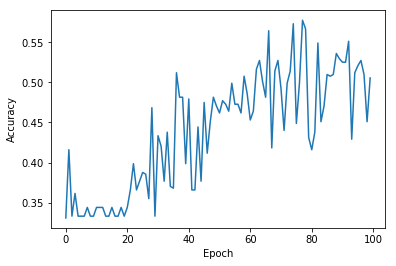

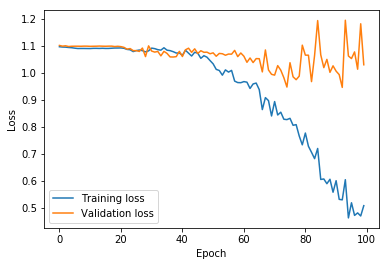

In [33]:
# ============ DOES NOT REQUIRE USER INPUT =============
if isfile(model_destination_folder + "/training_run_scores.npy") is False:
    accuracies, train_losses, val_losses = training_round(network_nocrop, [], [], [])
    np.save(model_destination_folder + "/training_run_scores.npy",
            np.array([accuracies, train_losses, val_losses]))
else:
    [accuracies, train_losses, val_losses] = np.load(model_destination_folder + "/training_run_scores.npy")

plot_accuracy_trainloss_valloss(accuracies, train_losses, val_losses)

### STEP 2: Perform the training on cropped images

Create the convolutional neural network object with the same architecture as previously.

In [34]:
# ============ DOES NOT REQUIRE USER INPUT =============
network_crop = ConvNet(input_shape=input_shape,
                       output_channels=output_channels, 
                       convolutional_layers=convolutional_layers,
                       connected_layers=connected_layers, 
                       keep_prob=keep_prob,
                       learning_rate=learning_rate,
                       model_name=model_name)

Specify the new model name and the location from which we get our training data.

In [35]:
# ===================== USER INPUT =====================
network_crop.learning_rate = 0.001
network_crop.model_name = "lenet_2x2_crop"
training_subfolder = "/training_data_crop"
testing_subfolder = "/testing_data_crop"
totnumbatches = network_crop.count_training_batches(data_folder + training_subfolder)
# ======================================================

Test whether the network correctly loads the images.

Image shape: (150, 150, 3)


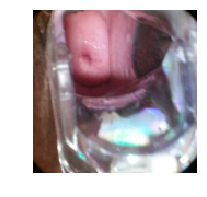

In [36]:
# ============ DOES NOT REQUIRE USER INPUT =============
network_crop.test_loading(batch_and_index=(0, 32), batch_loc=(data_folder+training_subfolder))

Fix the new training parameters (only need to set those which have changed).

In [37]:
# ===================== USER INPUT =====================
epochs = 100
training_batches = range(1, totnumbatches)
model_destination_folder = "./TensorFlow_data/lenet_2x2_crop"
printout = False
# ======================================================

Perform the training and save info to disk.

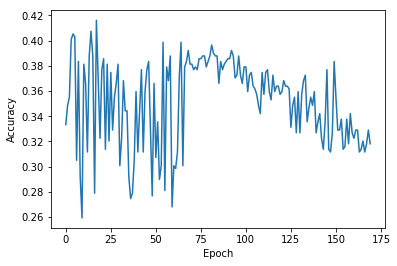

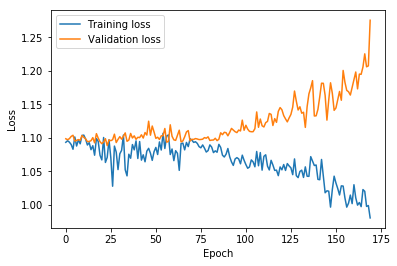

In [38]:
# ============ DOES NOT REQUIRE USER INPUT =============
if isfile(model_destination_folder + "/training_run_scores.npy") is False:
    accuracies, train_losses, val_losses = training_round(network_crop, [], [], [])
    np.save(model_destination_folder + "/training_run_scores.npy",
            np.array([accuracies, train_losses, val_losses]))
else:
    [accuracies, train_losses, val_losses] = np.load(model_destination_folder + "/training_run_scores.npy")

plot_accuracy_trainloss_valloss(accuracies, train_losses, val_losses)

### STEP 3: Perform the training on the diagrams of the images

Create the convolutional neural network object with the same architecture as previously.

In [39]:
input_shape = (80, 80, 3)

In [40]:
# ============ DOES NOT REQUIRE USER INPUT =============
network_cropdiagram = ConvNet(input_shape=input_shape,
                              output_channels=output_channels, 
                              convolutional_layers=convolutional_layers,
                              connected_layers=connected_layers, 
                              keep_prob=keep_prob,
                              learning_rate=learning_rate,
                              model_name=model_name)

Specify the new model name and the location from which we get our training data.

In [41]:
# ===================== USER INPUT =====================
network_cropdiagram.learning_rate = 0.001
network_cropdiagram.model_name = "lenet_2x2_cropdiagram"
training_subfolder = "/training_data_cropdiagram"
testing_subfolder = "/testing_data_cropdiagram"
totnumbatches = network_cropdiagram.count_training_batches(data_folder + training_subfolder)
# ======================================================

Test whether the network correctly loads the images.

Image shape: (80, 80, 3)


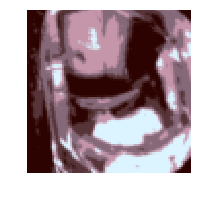

In [42]:
# ============ DOES NOT REQUIRE USER INPUT =============
network_cropdiagram.test_loading(batch_and_index=(0, 32), batch_loc=(data_folder+training_subfolder))

Fix the new training parameters (only need to set those which have changed).

In [43]:
# ===================== USER INPUT =====================
epochs = 100
training_batches = range(1, totnumbatches)
model_destination_folder = "./TensorFlow_data/lenet_2x2_cropdiagram"
load_saved_model = "./TensorFlow_data/lenet_2x2_cropdiagram/lenet_2x2_cropdiagram-70"
# ======================================================

Perform the training and save info to disk.

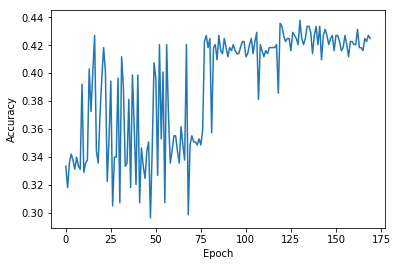

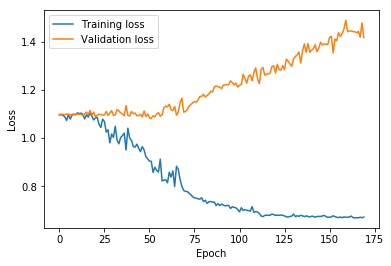

In [44]:
# ============ DOES NOT REQUIRE USER INPUT =============
if isfile(model_destination_folder + "/training_run_scores.npy") is False:
    accuracies, train_losses, val_losses = training_round(network_cropdiagram, [], [], [])
    np.save(model_destination_folder + "/training_run_scores.npy",
            np.array([accuracies, train_losses, val_losses]))
else:
    [accuracies, train_losses, val_losses] = np.load(model_destination_folder + "/training_run_scores.npy")

plot_accuracy_trainloss_valloss(accuracies, train_losses, val_losses)

## Make predictions on test set

We will now take our best trained model and make a predictions on the test set. The prediction needs to be in a format comptatible with Kaggle's [guidelines](https://www.kaggle.com/c/intel-mobileodt-cervical-cancer-screening#evaluation).

The predictions are made by running the data through the neural network and applying a softmax functions to the logits.

 - `load_saved_model` is the full path (including batch number) to the model to be used when making predictions.
 - `load_test_set` is the full path to the numpy data file which contains the test-set data.
 - Alternatively, the test set can be specified with the variable `test_set`.

In [45]:
# ===================== USER INPUT =====================
testing_subfolder = "/testing_data_nocrop"
training_subfolder = "/training_data_nocrop"
load_saved_model = "./TensorFlow_data/lenet_2x2_nocrop/lenet_2x2_nocrop-70"
load_test_set = data_folder + testing_subfolder + "/testing_images.npy"
test_set = []
# ======================================================

In order for the loading to work, we need to recreate the ConvNet object. This is because we ran other training runs since the creationf of network_nocrop, and so TensorFlow has difficulty when loading `saver.restore(sess, load_saved_model)`, presumably due to some strange handling of internal variables.

In [46]:
# ============== INPUT COPIED FROM ABOVE ===============
input_shape = (150, 150, 3)
output_channels = 3
convolutional_layers = [[20, (4, 4), (1, 1), (2, 2), (2, 2)],
                        [40, (4, 4), (1, 1), (2, 2), (2, 2)]]
connected_layers = [100, 30]
keep_prob = 0.5
learning_rate = 0.001 # standard value is 0.001
model_name = "lenet_2x2_nocrop" # This name means we have 2 convolutional layers and 2 fully connected layers
# ======================================================
network_nocrop = ConvNet(input_shape=input_shape,
                         output_channels=output_channels, 
                         convolutional_layers=convolutional_layers,
                         connected_layers=connected_layers, 
                         keep_prob=keep_prob,
                         learning_rate=learning_rate,
                         model_name=model_name)

Now we compute the probabilities for the test set.

In [47]:
# ============ DOES NOT REQUIRE USER INPUT =============
probabilities = network_nocrop.test(load_saved_model=load_saved_model,
                                    load_test_set=load_test_set, test_set=test_set)

### Check predictions

Plot a small subset of the test set and the generated predictions to get a feel for the quality of the predicted probabilities.

In [48]:
# ===================== USER INPUT =====================
num_images_to_check = 12
# ======================================================

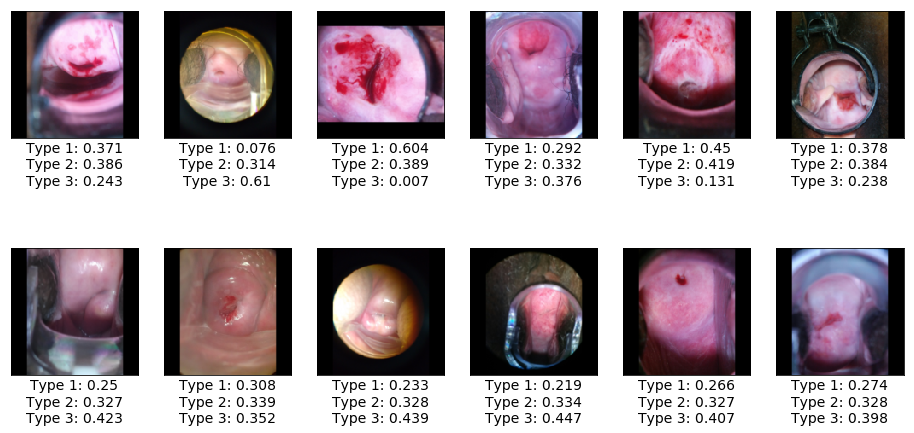

In [49]:
# ============ DOES NOT REQUIRE USER INPUT =============
from modules.visualization import display_image_probabilities

if len(test_set) == 0 and test_set == []:
    test_set = np.load(load_test_set)

np.random.seed(43)
indices_to_check = np.random.choice(range(len(test_set)), size=num_images_to_check)
fig, axes = display_image_probabilities(test_set[indices_to_check],
                                        probabilities[indices_to_check],
                                        data_folder + testing_subfolder)
fig

### Save prediction and make submission file

We are now ready to save the probabilities and make a submission to Kaggle.

 - `submission_folder` is the folder in which we place our submissions.

In [50]:
# ===================== USER INPUT =====================
submission_folder = "./submissions"
# ======================================================

Submissions are made into the above folder as csv files, with name `submissions` followed by the date and time of the file creating, i.e. `submissions_yyyy-mm-dd_hh-mm.csv`. For example, a submission file made on 30 April 2017 at 16:40 is saved as `submissions_2017-04-30_16-40.csv`.

In [51]:
# ============ DOES NOT REQUIRE USER INPUT =============
from modules.path_munging import submission

saved_path = submission(probabilities, data_folder + testing_subfolder, submission_folder)
print("Saved submission results to: " + saved_path)

Saved submission results to: ./submissions/submissions_2017-05-29_17-27.csv


This submission obtained the Kaggle test-set score **0.99060**.

# Hyperparameter Exploration

We now test what the performance of our model is as we change the architecture of the neural networks, in order to find a more suitable architecture for the problem at hand.

We begin by setting the variables which are identical for all hyperparameter-explorations runs.

In [52]:
# ===================== USER INPUT =====================
data_folder = "./TensorFlow_data"
training_subfolder = "/training_data_nocrop"
testing_subfolder = "/testing_data_nocrop"
size_of_minibatch = 2**6
totnumbatches = network_nocrop.count_training_batches(data_folder + training_subfolder)
validation_batch = 0
validation_inputarray = []
validation_labels = []

load_test_set = data_folder + testing_subfolder + "/testing_images.npy"
test_set = []
# ======================================================

## Fewer convolutional-layer channels

We begin by considering neural networks with fewer output channels in the first two convolutional layers.

In [53]:
# ===================== USER INPUT =====================
input_shape = (150, 150, 3)
output_channels = 3
convolutional_layers = [[10, (4, 4), (1, 1), (2, 2), (2, 2)],
                        [20, (4, 4), (1, 1), (2, 2), (2, 2)]]
connected_layers = [100, 30]
keep_prob = 0.5
learning_rate = 0.001 # standard value is 0.001
model_name = "lenet_2smallx2_nocrop" # This name means we have 2 small convolutional layers
# ======================================================

In [54]:
# ============ DOES NOT REQUIRE USER INPUT =============
network_nocrop_fewchan = ConvNet(input_shape=input_shape,
                                 output_channels=output_channels, 
                                 convolutional_layers=convolutional_layers,
                                 connected_layers=connected_layers, 
                                 keep_prob=keep_prob,
                                 learning_rate=learning_rate,
                                 model_name=model_name)

We check that it loads images correctly.

Image shape: (150, 150, 3)


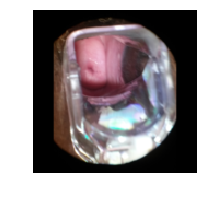

In [55]:
# ============ DOES NOT REQUIRE USER INPUT =============
network_nocrop_fewchan.test_loading(batch_and_index=(0, 32), batch_loc=(data_folder+training_subfolder))

Now we perform the training and save the results to disk.

In [56]:
# ===================== USER INPUT =====================
epochs = 170
load_saved_model = ""
training_batches = range(1, totnumbatches)
leftright = True
updown = True
save_model = True
model_destination_folder = "./TensorFlow_data/lenet_2smallx2_nocrop"
printout = False
# ======================================================

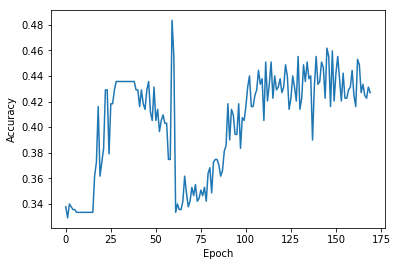

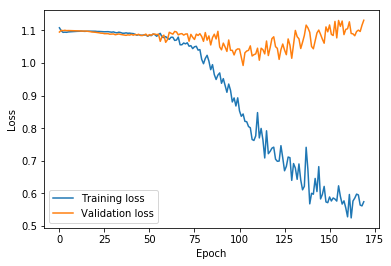

In [57]:
# ============ DOES NOT REQUIRE USER INPUT =============
if isfile(model_destination_folder + "/training_run_scores.npy") is False:
    accuracies, train_losses, val_losses = training_round(network_nocrop_fewchan, [], [], [])
    np.save(model_destination_folder + "/training_run_scores.npy",
            np.array([accuracies, train_losses, val_losses]))
else:
    [accuracies, train_losses, val_losses] = np.load(model_destination_folder + "/training_run_scores.npy")

plot_accuracy_trainloss_valloss(accuracies, train_losses, val_losses)

We see that there is not much improvement compared to the original network; in fact, this may even constitute slightly worse results.

### Prediction on test set

We now use this model (at the 100th epoch) to make a prediction on the test set which will then be sent to Kaggle for scoring.

In [58]:
# ===================== USER INPUT =====================
load_saved_model = "./TensorFlow_data/" + model_name + "/" + model_name + "-100"
# ======================================================

In [59]:
# ============ DOES NOT REQUIRE USER INPUT =============
probabilities = network_nocrop_fewchan.test(load_saved_model=load_saved_model,
                                            load_test_set=load_test_set, test_set=test_set)

Visually verify that the predictions seem to make sense, on the test set.

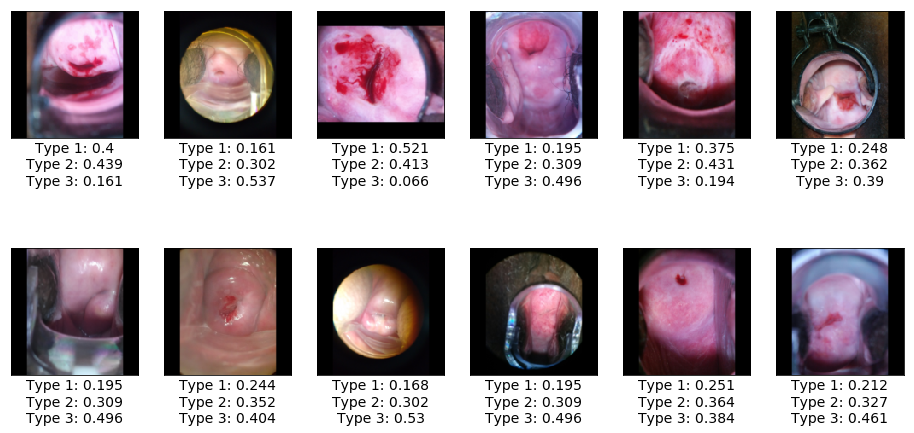

In [60]:
# ============ DOES NOT REQUIRE USER INPUT =============
num_images_to_check = 12

from modules.visualization import display_image_probabilities

if len(test_set) == 0 and test_set == []:
    test_set = np.load(load_test_set)

np.random.seed(43)
indices_to_check = np.random.choice(range(len(test_set)), size=num_images_to_check)
fig, axes = display_image_probabilities(test_set[indices_to_check],
                                        probabilities[indices_to_check],
                                        data_folder + testing_subfolder)
fig

Save the submission.

In [61]:
# ===================== USER INPUT =====================
submission_folder = "./submissions"
# ======================================================

In [62]:
# ============ DOES NOT REQUIRE USER INPUT =============
from modules.path_munging import submission

saved_path = submission(probabilities, data_folder + testing_subfolder, submission_folder)
print("Saved submission results to: " + saved_path)

Saved submission results to: ./submissions/submissions_2017-05-29_17-27.csv


This submission obtained the Kaggle test-set score **1.00499**.

## Larger fully-connected layers

We now check what the effect is of increasing the size of the fully-connected layers. Decreasing their size creates large training plateaus where are probabilities are set to 1/3, and is hence not condusive to good training.

In [63]:
# ===================== USER INPUT =====================
input_shape = (150, 150, 3)
output_channels = 3
convolutional_layers = [[20, (4, 4), (1, 1), (2, 2), (2, 2)],
                        [40, (4, 4), (1, 1), (2, 2), (2, 2)]]
connected_layers = [200, 60]
keep_prob = 0.75
learning_rate = 0.001 # standard value is 0.001
model_name = "lenet_2x2small_nocrop"
# ======================================================

In [64]:
# ============ DOES NOT REQUIRE USER INPUT =============
network_nocrop_smallconn = ConvNet(input_shape=input_shape,
                                   output_channels=output_channels, 
                                   convolutional_layers=convolutional_layers,
                                   connected_layers=connected_layers, 
                                   keep_prob=keep_prob,
                                   learning_rate=learning_rate,
                                   model_name=model_name)

We check that it loads images correctly.

Image shape: (150, 150, 3)


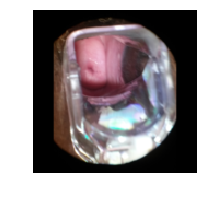

In [65]:
# ============ DOES NOT REQUIRE USER INPUT =============
network_nocrop_smallconn.test_loading(batch_and_index=(0, 32), batch_loc=(data_folder+training_subfolder))

Now we perform the training and save the results to disk.

In [66]:
# ===================== USER INPUT =====================
epochs = 50
load_saved_model = ""
training_batches = range(1, totnumbatches)
leftright = True
updown = True
save_model = True
model_destination_folder = "./TensorFlow_data/lenet_2x2small_nocrop"
printout = False
# ======================================================

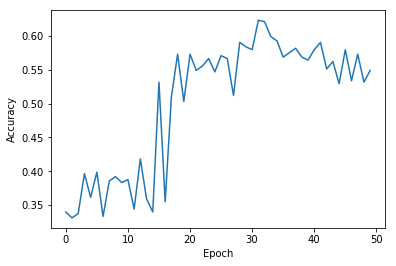

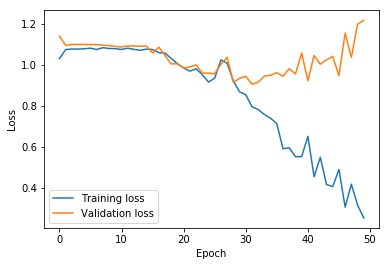

In [67]:
# ============ DOES NOT REQUIRE USER INPUT =============
if isfile(model_destination_folder + "/training_run_scores.npy") is False:
    accuracies, train_losses, val_losses = training_round(network_nocrop_smallconn, [], [], [])
    np.save(model_destination_folder + "/training_run_scores.npy",
            np.array([accuracies, train_losses, val_losses]))
else:
    [accuracies, train_losses, val_losses] = np.load(model_destination_folder + "/training_run_scores.npy")

plot_accuracy_trainloss_valloss(accuracies, train_losses, val_losses)

There is some improvement, if only very slight, over the training using the original model.

### Prediction on test set

We now use this model (at the 30th epoch) to make a prediction on the test set which will then be sent to Kaggle for scoring.

In [68]:
# ===================== USER INPUT =====================
load_saved_model = "./TensorFlow_data/" + model_name + "/" + model_name + "-30"
# ======================================================

In [69]:
# ============ DOES NOT REQUIRE USER INPUT =============
probabilities = network_nocrop_smallconn.test(load_saved_model=load_saved_model,
                                              load_test_set=load_test_set, test_set=test_set)

Visually verify that the predictions seem to make sense, on the test set.

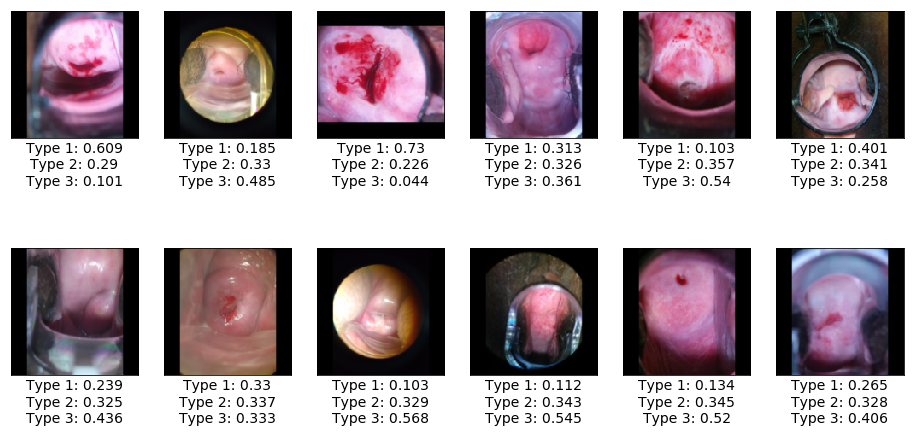

In [70]:
# ============ DOES NOT REQUIRE USER INPUT =============
num_images_to_check = 12

from modules.visualization import display_image_probabilities

if len(test_set) == 0 and test_set == []:
    test_set = np.load(load_test_set)

np.random.seed(43)
indices_to_check = np.random.choice(range(len(test_set)), size=num_images_to_check)
fig, axes = display_image_probabilities(test_set[indices_to_check],
                                        probabilities[indices_to_check],
                                        data_folder + testing_subfolder)
fig

Save the submission.

In [71]:
# ===================== USER INPUT =====================
submission_folder = "./submissions"
# ======================================================

In [72]:
# ============ DOES NOT REQUIRE USER INPUT =============
from modules.path_munging import submission

saved_path = submission(probabilities, data_folder + testing_subfolder, submission_folder)
print("Saved submission results to: " + saved_path)

Saved submission results to: ./submissions/submissions_2017-05-29_17-27.csv


This submission obtained the Kaggle test-set score **0.99195**.

## Both fewer convolutional-layer channels and smaller fully-connected layers

It may be that a combination of the two changes above is better than either one of them in isolation. We will now try both decreasing the number of output channels of the convolutional layers and increase the size of the fully-connected layers.

In [73]:
# ===================== USER INPUT =====================
input_shape = (150, 150, 3)
output_channels = 3
convolutional_layers = [[10, (4, 4), (1, 1), (2, 2), (2, 2)],
                        [20, (4, 4), (1, 1), (2, 2), (2, 2)]]
connected_layers = [200, 60]
keep_prob = 0.75
learning_rate = 0.001 # standard value is 0.001
model_name = "lenet_2smallx2large_nocrop"
# ======================================================

In [74]:
# ============ DOES NOT REQUIRE USER INPUT =============
network_nocrop_fewchan_largeconn = ConvNet(input_shape=input_shape,
                                           output_channels=output_channels, 
                                           convolutional_layers=convolutional_layers,
                                           connected_layers=connected_layers, 
                                           keep_prob=keep_prob,
                                           learning_rate=learning_rate,
                                           model_name=model_name)

We check that it loads images correctly.

Image shape: (150, 150, 3)


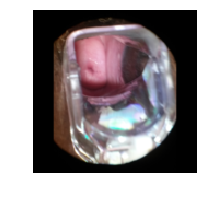

In [75]:
# ============ DOES NOT REQUIRE USER INPUT =============
network_nocrop_fewchan_largeconn.test_loading(batch_and_index=(0, 32), batch_loc=(data_folder+training_subfolder))

Now we perform the training and save the results to disk.

In [76]:
# ===================== USER INPUT =====================
epochs = 40
load_saved_model = ""
training_batches = range(1, totnumbatches)
leftright = True
updown = True
save_model = True
model_destination_folder = "./TensorFlow_data/lenet_2smallx2large_nocrop"
printout = False
# ======================================================

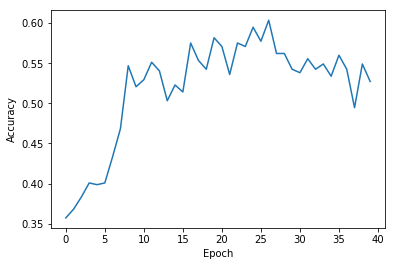

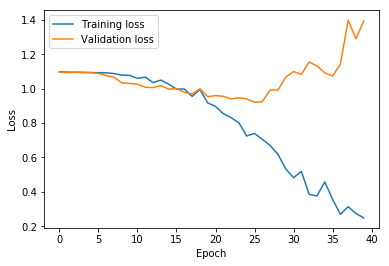

In [77]:
# ============ DOES NOT REQUIRE USER INPUT =============
if isfile(model_destination_folder + "/training_run_scores.npy") is False:
    accuracies, train_losses, val_losses = training_round(network_nocrop_fewchan_largeconn, [], [], [])
    np.save(model_destination_folder + "/training_run_scores.npy",
            np.array([accuracies, train_losses, val_losses]))
else:
    [accuracies, train_losses, val_losses] = np.load(model_destination_folder + "/training_run_scores.npy")

plot_accuracy_trainloss_valloss(accuracies, train_losses, val_losses)

The training here seems to clearly be worse than for the original model's architecture.

### Prediction on test set

We now use this model (at the 20th epoch) to make a prediction on the test set which will then be sent to Kaggle for scoring.

In [78]:
# ===================== USER INPUT =====================
load_saved_model = "./TensorFlow_data/" + model_name + "/" + model_name + "-20"
# ======================================================

In [79]:
# ============ DOES NOT REQUIRE USER INPUT =============
probabilities = network_nocrop_fewchan_largeconn.test(load_saved_model=load_saved_model,
                                                      load_test_set=load_test_set, test_set=test_set)

Visually verify that the predictions seem to make sense, on the test set.

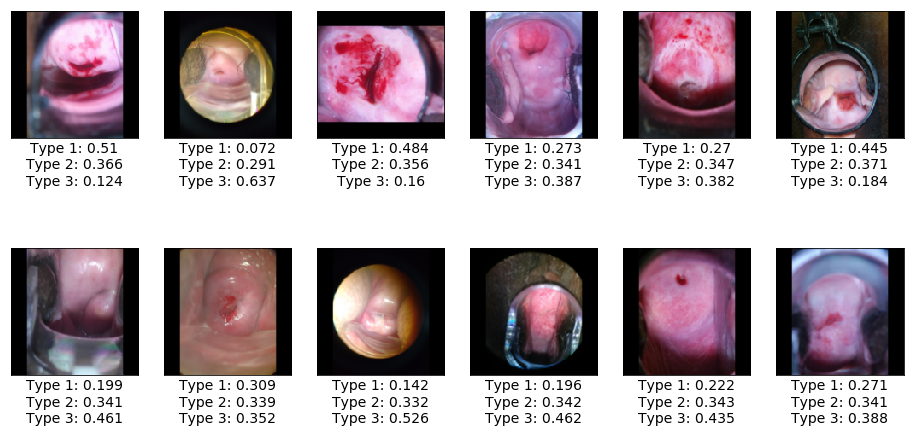

In [80]:
# ============ DOES NOT REQUIRE USER INPUT =============
num_images_to_check = 12

from modules.visualization import display_image_probabilities

if len(test_set) == 0 and test_set == []:
    test_set = np.load(load_test_set)

np.random.seed(43)
indices_to_check = np.random.choice(range(len(test_set)), size=num_images_to_check)
fig, axes = display_image_probabilities(test_set[indices_to_check],
                                        probabilities[indices_to_check],
                                        data_folder + testing_subfolder)
fig

Save the submission.

In [81]:
# ===================== USER INPUT =====================
submission_folder = "./submissions"
# ======================================================

In [82]:
# ============ DOES NOT REQUIRE USER INPUT =============
from modules.path_munging import submission

saved_path = submission(probabilities, data_folder + testing_subfolder, submission_folder)
print("Saved submission results to: " + saved_path)

Saved submission results to: ./submissions/submissions_2017-05-29_17-27.csv


This submission obtained the Kaggle test-set score **1.00052**.

## Convolutional filters of size 1x1

The best architecture so far was to have convolutional layers of sized 20 and 40, followed by fully-connected layers of sizes 200 and 60. It may be that convolutional layers of size 1x1 can tease out the importance of the color red, before running this architecture. We will now explore this possibility.

In [83]:
# ===================== USER INPUT =====================
input_shape = (150, 150, 3)
output_channels = 3
convolutional_layers = [[5, (1, 1), (1, 1), (1, 1), (1, 1)],
                        [2, (1, 1), (1, 1), (1, 1), (1, 1)],
                        [20, (4, 4), (1, 1), (2, 2), (2, 2)],
                        [40, (4, 4), (1, 1), (2, 2), (2, 2)]]
connected_layers = [200, 60]
keep_prob = 0.75
learning_rate = 0.001 # standard value is 0.001
model_name = "lenet_1x1_2x2large_nocrop"
# ======================================================

In [84]:
# ============ DOES NOT REQUIRE USER INPUT =============
network_nocrop_1x1_largeconn = ConvNet(input_shape=input_shape,
                                       output_channels=output_channels, 
                                       convolutional_layers=convolutional_layers,
                                       connected_layers=connected_layers, 
                                       keep_prob=keep_prob,
                                       learning_rate=learning_rate,
                                       model_name=model_name)

We check that it loads images correctly.

Image shape: (150, 150, 3)


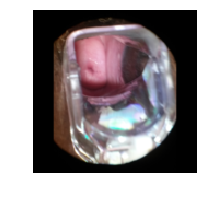

In [85]:
# ============ DOES NOT REQUIRE USER INPUT =============
network_nocrop_1x1_largeconn.test_loading(batch_and_index=(0, 32), batch_loc=(data_folder+training_subfolder))

Now we perform the training and save the results to disk.

In [86]:
# ===================== USER INPUT =====================
epochs = 30
load_saved_model = ""
training_batches = range(1, totnumbatches)
leftright = True
updown = True
save_model = True
model_destination_folder = "./TensorFlow_data/lenet_1x1_2x2large_nocrop"
printout = False
# ======================================================

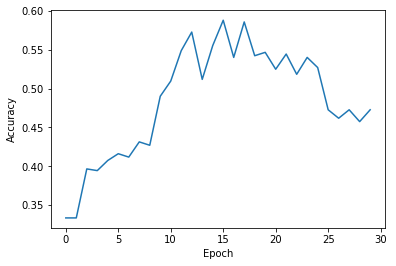

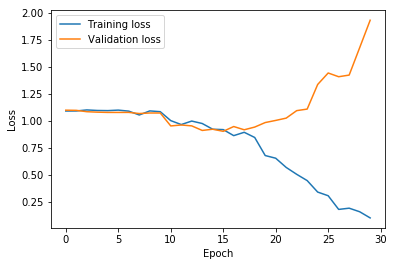

In [87]:
# ============ DOES NOT REQUIRE USER INPUT =============
if isfile(model_destination_folder + "/training_run_scores.npy") is False:
    accuracies, train_losses, val_losses = training_round(network_nocrop_1x1_largeconn, [], [], [])
    np.save(model_destination_folder + "/training_run_scores.npy",
            np.array([accuracies, train_losses, val_losses]))
else:
    [accuracies, train_losses, val_losses] = np.load(model_destination_folder + "/training_run_scores.npy")

plot_accuracy_trainloss_valloss(accuracies, train_losses, val_losses)

The performance after introducing the 1x1 convolutional layers is worse than before using these layers. Therefore, we discard them from our architecture.

### Prediction on test set

We now use this model (at the 15th epoch) to make a prediction on the test set which will then be sent to Kaggle for scoring.

In [88]:
# ===================== USER INPUT =====================
load_saved_model = "./TensorFlow_data/" + model_name + "/" + model_name + "-15"
# ======================================================

In [89]:
# ============ DOES NOT REQUIRE USER INPUT =============
probabilities = network_nocrop_1x1_largeconn.test(load_saved_model=load_saved_model,
                                                  load_test_set=load_test_set, test_set=test_set)

Visually verify that the predictions seem to make sense, on the test set.

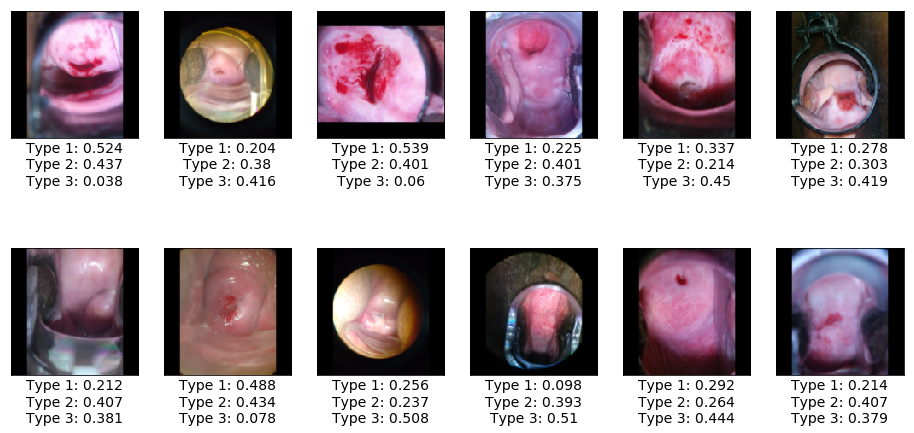

In [90]:
# ============ DOES NOT REQUIRE USER INPUT =============
num_images_to_check = 12

from modules.visualization import display_image_probabilities

if len(test_set) == 0 and test_set == []:
    test_set = np.load(load_test_set)

np.random.seed(43)
indices_to_check = np.random.choice(range(len(test_set)), size=num_images_to_check)
fig, axes = display_image_probabilities(test_set[indices_to_check],
                                        probabilities[indices_to_check],
                                        data_folder + testing_subfolder)
fig

Save the submission.

In [91]:
# ===================== USER INPUT =====================
submission_folder = "./submissions"
# ======================================================

In [92]:
# ============ DOES NOT REQUIRE USER INPUT =============
from modules.path_munging import submission

saved_path = submission(probabilities, data_folder + testing_subfolder, submission_folder)
print("Saved submission results to: " + saved_path)

Saved submission results to: ./submissions/submissions_2017-05-29_17-27.csv


This submission obtained the Kaggle test-set score **1.01872**.

# Track validation loss with size of training data 

In order to decide whether we need more data or more hyper-parameters, we will go through the full training for an ever-increasing number of batches. We will then plot how the validation loss improves, and in particular whether it flattens out to a plateau. This will help us determine whether the network needs to be more complex or whether we need to increase the amount of data we train on.

Here we should set `epochs` to the number of epochs that is just before we begin overfitting.

We will do this exercise on the network architecture which has currently been the one which performed best.

In [93]:
# ===================== USER INPUT =====================
input_shape = (150, 150, 3)
output_channels = 3
convolutional_layers = [[20, (4, 4), (1, 1), (2, 2), (2, 2)],
                        [40, (4, 4), (1, 1), (2, 2), (2, 2)]]
connected_layers = [200, 60]
keep_prob = 0.75
learning_rate = 0.001 # standard value is 0.001
model_name = "lenet2x2_batch"

epochs = 50
model_destination_folder = "./TensorFlow_data/size_influence_models"
load_saved_model = ""
training_batches = range(1, totnumbatches)
# ======================================================

In [94]:
# ============ DOES NOT REQUIRE USER INPUT =============
bestmodel = ConvNet(input_shape=input_shape,
                    output_channels=output_channels, 
                    convolutional_layers=convolutional_layers,
                    connected_layers=connected_layers, 
                    keep_prob=keep_prob,
                    learning_rate=learning_rate,
                    model_name=model_name)

In the cell below we perform the traninig on each subset of the data. We store the accuracy, training loss and validation loss for each epoch of each training session in a variable called `allaccuracies`.

If we have already done this, we simply load the previsouly-done evaluations.

In [95]:
# ============ DOES NOT REQUIRE USER INPUT =============
if isfile(model_destination_folder + "/allaccuracies.npy") is False:
    allaccuracies = {}
    
    tot_num_training_batches = totnumbatches
    for ii_max in range(2, tot_num_training_batches+1):
        accuracies = []
        train_losses = []
        val_losses = []
        # Set the training batches
        training_batches = range(1, ii_max)
        print(training_batches)
        # The model name is of the form lenet2x2_batch01234 if training batches [0, 1, 2, 3, 4]
        bestmodel.model_name = "lenet2x2_batch" + "".join([str(num) for num in training_batches])
        accuracies, train_losses, val_losses = training_round(bestmodel, accuracies, train_losses, val_losses)
        # We store the set of accuracies, training losses and validation losses for future comparison
        allaccuracies.update({bestmodel.model_name: [accuracies, train_losses, val_losses]})
    np.save(model_destination_folder + "/allaccuracies.npy", allaccuracies)
else:
    allaccuracies = np.load(model_destination_folder + "/allaccuracies.npy").all()

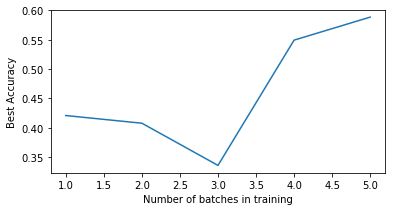

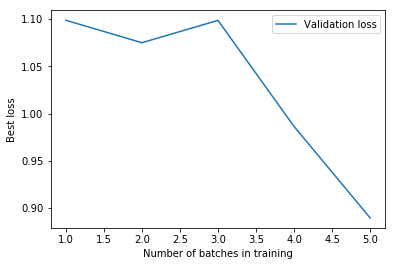

In [96]:
# ============ DOES NOT REQUIRE USER INPUT =============
from modules.neural_network import best_accuracy_trainval_loss
from modules.visualization import plot_best_scores

best_accuracy, best_train_loss, best_val_loss = best_accuracy_trainval_loss(allaccuracies)
plot_best_scores(best_accuracy, best_train_loss, best_val_loss)

From the graphs above we can see that our model complexity is probably sufficient for now, and our ability to capture variance in the validation set is dictated by the lack of training data.

#### Visualize training for best-performing model

The final model (i.e. the one trained on all available training batches) was the best. We will see how its accuracy, training loss and validation loss performed through the training and whether we began to overfit.

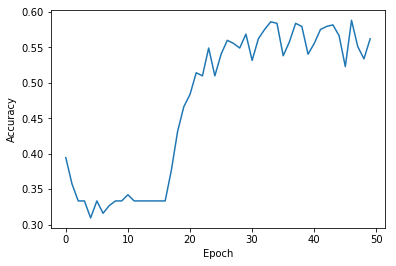

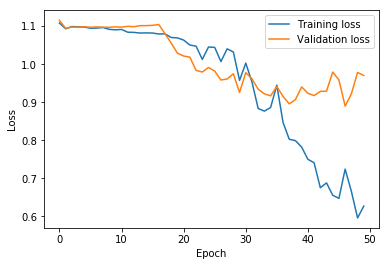

In [97]:
# ============ DOES NOT REQUIRE USER INPUT =============
from modules.neural_network import sort_accuracies

best_training_run_scores = sort_accuracies(allaccuracies)[-1][1]

plot_accuracy_trainloss_valloss(best_training_run_scores[0],
                                best_training_run_scores[1],
                                best_training_run_scores[2])

From the above we see that we have a decent model which did not overfit.